In [3]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('netflix_titles.csv')

In [3]:
# Display the first 5 rows of the dataset
print("\nThe first 5 rows of the dataset")
df.head(5)


The first 5 rows of the dataset


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Display basic info about the dataset
print("\nThe Information for the dataset is:")
print(df.info())

# Check for missing values
print("\nThe Missing values of the dataset is:")
print(df.isnull().sum())


The Information for the dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

The Missing values of the dataset is:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rat

In [11]:
# Fill or drop missing values (for simplicity, we'll fill 'NaN' with 'Unknown')
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

In [9]:
# Display total number of Movies and TV Shows
print("\nThe total numbers of TV shows and Movies are:")
print(df['type'].value_counts())


The total numbers of TV shows and Movies are:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


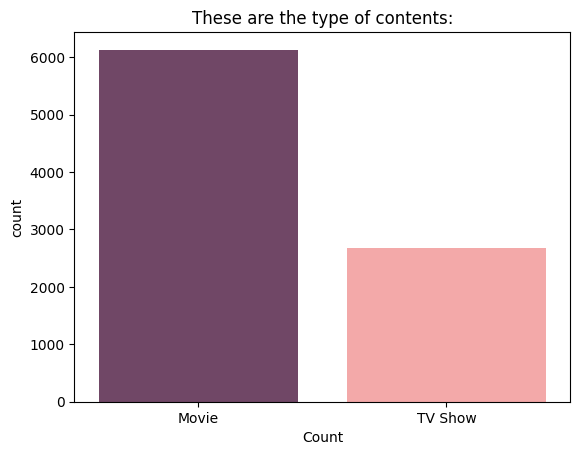

In [15]:
# Plot content types
sns.countplot(data=df, x='type', hue='type', legend=False, palette=["#774069", "#FF9D9D"])
plt.title( "These are the type of contents:")
plt.xlabel("Type")
plt.xlabel("Count")
plt.show()

In [4]:
# Show top 10 genres (listed in 'listed_in' column)
print("\nThe top 10 genres are:")
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
print(genres)


The top 10 genres are:
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


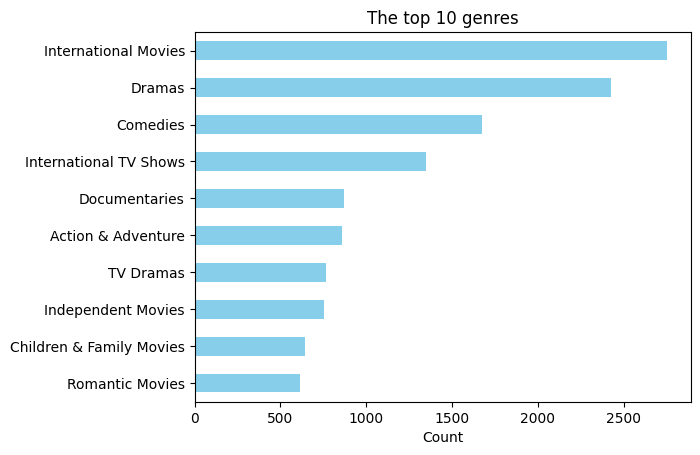

In [5]:
# Plot top 10 genres
# sns.countplot(data=df, x='type', hue='type', legend=False, palette=["#774069", "#FF9D9D"])
genres.plot(kind="barh", color="skyblue")
plt.title("The top 10 genres")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

In [6]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

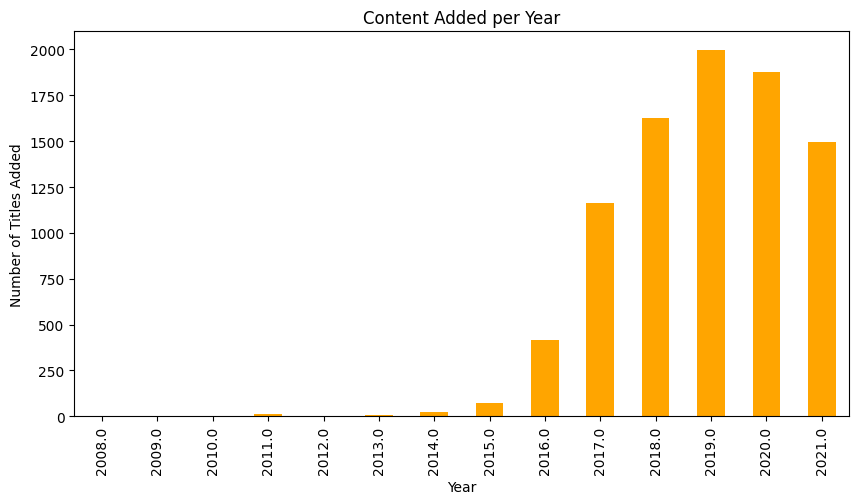

In [8]:
# Plot content added each year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("Content Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

In [10]:
# Display number of movies released by country (Top 10)
top_countries = df['country'].value_counts().head(10)
print("\nTop 10 Countries by Content Count:")
print(top_countries)


Top 10 Countries by Content Count:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


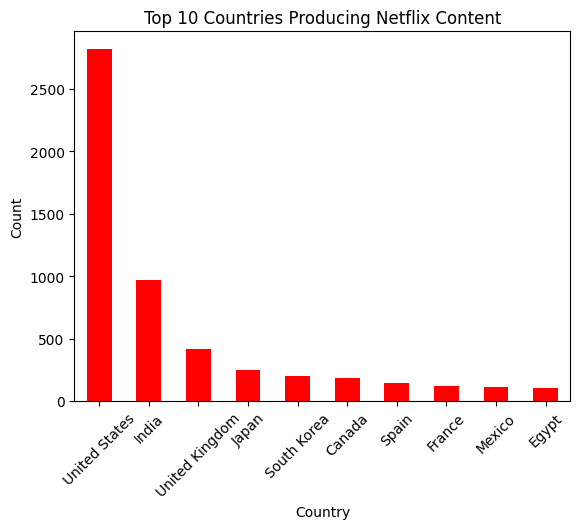

In [13]:
# Plot top 10 countries
top_countries.plot(kind='bar', color='red')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Search and Filter: Example - All Indian Movies after 2015
indian_movies = df[(df['country'].str.contains('India')) & 
                   (df['type'] == 'Movie') & 
                   (df['release_year'] > 2015)]

print("\nIndian Movies after 2015:")
print(indian_movies[['title', 'release_year', 'listed_in']].head(10))


Indian Movies after 2015:
                            title  release_year  \
105              Angamaly Diaries          2017   
118                       Gurgaon          2017   
126                       Shikara          2020   
190                    Thimmarusu          2021   
203          Kyaa Kool Hain Hum 3          2016   
259                        Pahuna          2018   
518  Har Kisse Ke Hisse: Kaamyaab          2020   
541              Truckbhar Swapna          2018   
551               Haseen Dillruba          2021   
735                       Sarbath          2021   

                                            listed_in  
105              Action & Adventure, Comedies, Dramas  
118           Dramas, International Movies, Thrillers  
126     Dramas, International Movies, Romantic Movies  
190                      Dramas, International Movies  
203                    Comedies, International Movies  
259            Comedies, Dramas, International Movies  
518                